### Fathia Nuq Qamarina
### 2009106012
### KB A1 20
### Posttest 6

 #### Import Pacckage dan Membaca Dataset


In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [170]:
df = pd.read_csv("Data_Employee_baru.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,EverBenched_No,EverBenched_Yes
0,Bachelors,2017,Bangalore,3.000000,34,Male,No,0,0,1.0,0.0
1,Bachelors,2013,Pune,1.000000,28,Female,No,3,1,1.0,0.0
2,Bachelors,2014,New Delhi,3.000000,29,Female,No,2,0,1.0,0.0
3,Masters,2016,Bangalore,2.698194,27,Male,No,5,1,1.0,0.0
4,Masters,2017,Pune,3.000000,24,Male,Yes,2,1,0.0,1.0


#### Membuang Kolom Label 

In [171]:
df.drop(['LeaveOrNot'], axis =1)
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,EverBenched_No,EverBenched_Yes
0,Bachelors,2017,Bangalore,3.000000,34,Male,No,0,0,1.0,0.0
1,Bachelors,2013,Pune,1.000000,28,Female,No,3,1,1.0,0.0
2,Bachelors,2014,New Delhi,3.000000,29,Female,No,2,0,1.0,0.0
3,Masters,2016,Bangalore,2.698194,27,Male,No,5,1,1.0,0.0
4,Masters,2017,Pune,3.000000,24,Male,Yes,2,1,0.0,1.0


#### Membuat Objek dari KMeans dengan jumlah cluster : 3

In [172]:
model= KMeans(n_clusters=3)

#### Memilih Atribut yang akan dilatih 

In [173]:
points = df[["ExperienceInCurrentDomain","JoiningYear"]]

#### Melakukan Fit terhadap Model

In [174]:
model.fit(points)

KMeans(n_clusters=3)

#### Menentukan label untuk cluster

In [175]:
labels = model.labels_
labels

array([0, 1, 2, ..., 2, 0, 2])

#### Evaluasi Hasil Pemodelan

In [176]:
# membuat dataframe dengan label dan LeaveOrNot sebagai kolom
dfKmeans = pd.DataFrame({'labels': labels, 'LeaveOrNot': df.LeaveOrNot})

ct = pd.crosstab(dfKmeans["labels"],dfKmeans["LeaveOrNot"])
ct

LeaveOrNot,0,1
labels,,
0,622,499
1,544,289
2,510,300


#### Melihat Centroid dari model yang sudah dibuat

#### Visualisasi

In [177]:
#mengambil semua baris pada kolom tertentu 
xs = points.iloc[:,0]
ys = points.iloc[:,1]

# Menampung koordinat dari tiap centroid
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids

array([[2.57983943e+00, 2.01701695e+03],
       [4.14885954e+00, 2.01375870e+03],
       [1.18641975e+00, 2.01379383e+03]])

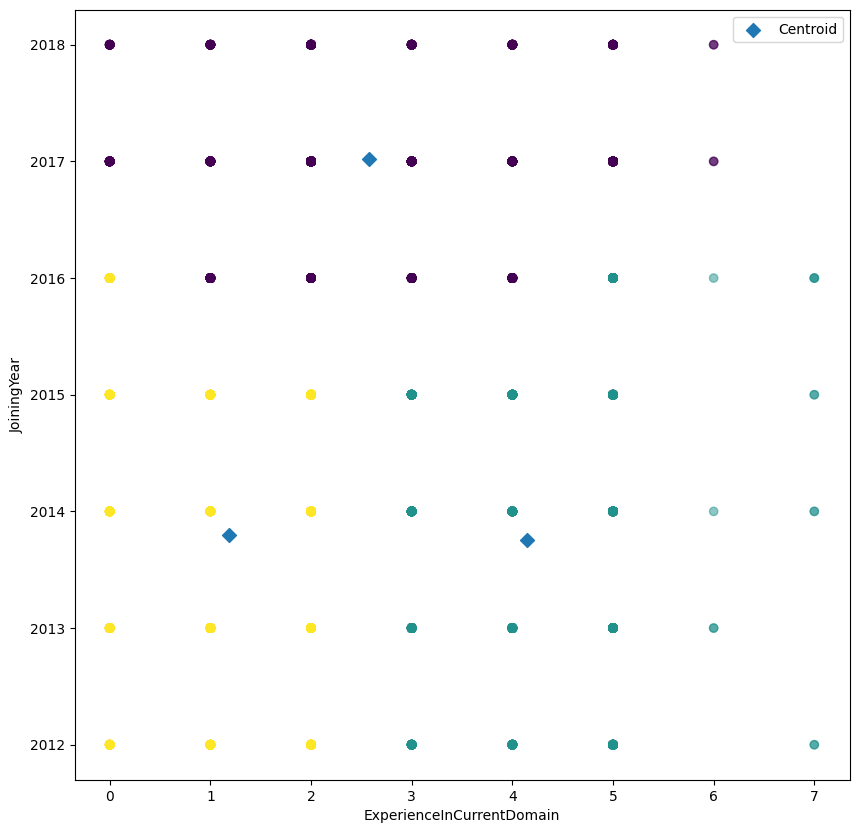

In [178]:
# visualisasi cluster
plt.figure(figsize=(10,10))
plt.scatter(xs,ys,alpha=0.5,c=labels)
plt.scatter(centroids_x,centroids_y,marker="D",s=50,label="Centroid")
plt.xlabel("ExperienceInCurrentDomain")
plt.ylabel("JoiningYear")
plt.legend()
plt.show()

#### Menentukan Jumlah Cluster (Elbow Method)

In [179]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

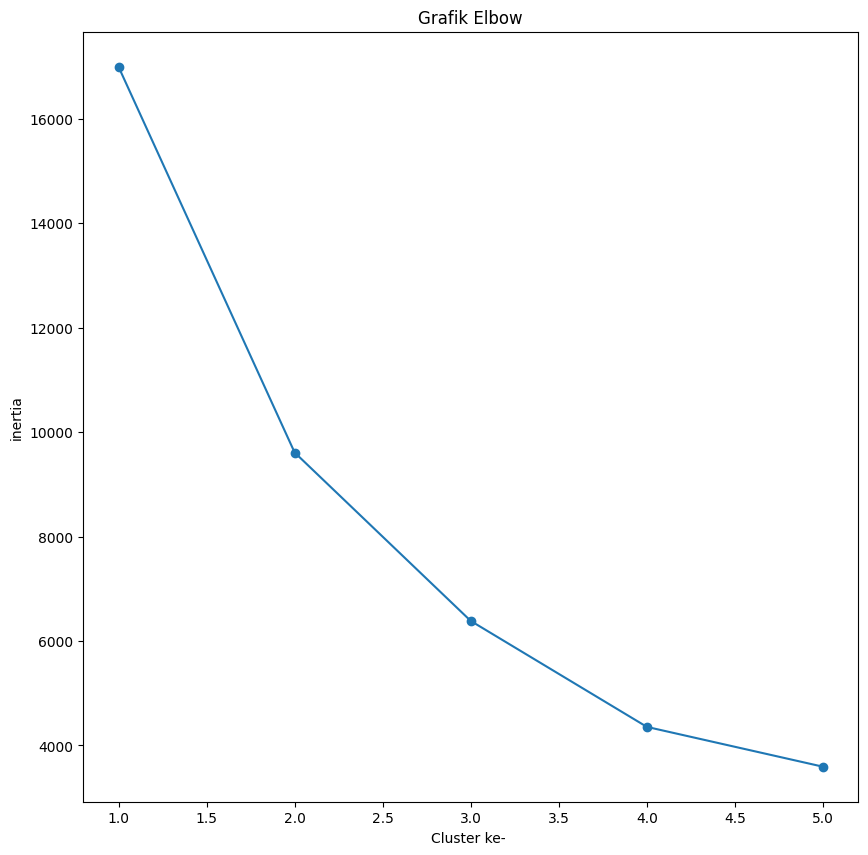

In [180]:
plt.figure(figsize=(10,10))
plt.plot(cluster_range, inertias, '-o')
plt.title("Grafik Elbow")
plt.xlabel("Cluster ke- ")
plt.ylabel('inertia')
plt.show()